<a href="https://colab.research.google.com/github/Resia05/supervised-learning/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%222_4_kNN_%D0%9A%D1%80%D0%BE%D1%81%D0%B2%D0%B0%D0%BB%D1%96%D0%B4%D0%B0%D1%86%D1%96%D1%8F_%D1%96_%D1%82%D1%8E%D0%BD%D0%B8%D0%BD%D0%B3_%D0%B3%D1%96%D0%BF%D0%B5%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D1%96%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
import joblib
import warnings
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from typing import Tuple, Dict, Any, List

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням kNearestNeighboors, знайдемо оптимальні гіперпараметри для цього методу і зробимо базові ансамблі. Це дасть змогу порівняти перформанс моделі з попередніми вивченими методами.

0. Зчитайте дані `train.csv` та зробіть препроцесинг використовуючи написаний Вами скрипт `process_bank_churn.py` так, аби в результаті отримати дані в розбитті X_train, train_targets, X_val, val_targets для експериментів.

  Якщо Вам не вдалось реалізувати в завданні `2.3. Дерева прийняття рішень` скрипт `process_bank_churn.py` - можна скористатись готовим скриптом з запропонованого рішення того завдання.

In [ ]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from process_bank_churn import preprocess_data

In [ ]:
raw_df = pd.read_csv('train.csv')
data = preprocess_data(raw_df)

In [57]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [56]:
data['X_train'].assign(Exited=data['train_targets']).corr().Exited.to_frame().style.background_gradient(cmap='coolwarm')


,Exited
CreditScore,-0.003938
Age,-0.025237
Tenure,0.012966
Balance,-0.012332
NumOfProducts,0.008430
HasCrCard,-0.002183
IsActiveMember,-0.014436
EstimatedSalary,0.007126
Geography_France,0.010911
Geography_Germany,-0.006049


In [58]:
X1 = raw_df[['Tenure', 'Age']]
y1 = raw_df['Exited']

In [60]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=42)

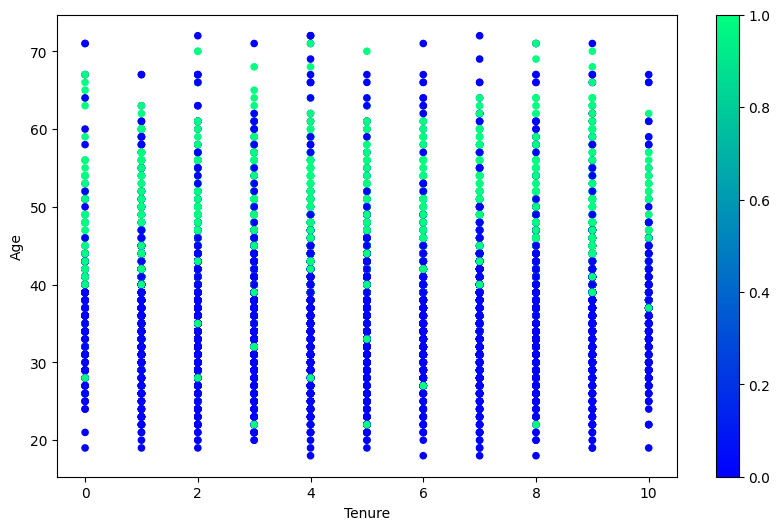

In [62]:
X_train1.plot.scatter(x='Tenure', y='Age', c=y_train1, cmap='winter', figsize=(10,6));

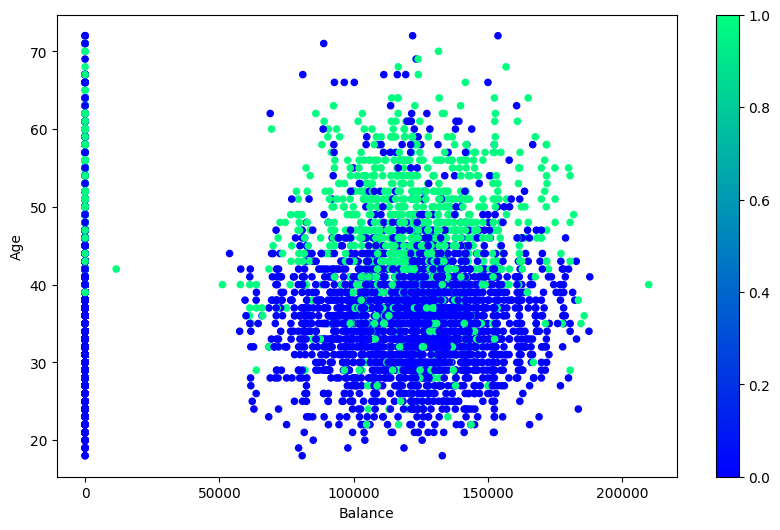

In [63]:
X2 = raw_df[['Balance', 'Age']]
y2 = raw_df['Exited']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=42)
X_train2.plot.scatter(x='Balance', y='Age', c=y_train2, cmap='winter', figsize=(10,6));

1. Навчіть на цих даних класифікатор kNN з параметрами за замовченням і виміряйте точність з допомогою AUROC на тренувальному та валідаційному наборах. Зробіть заключення про отриману модель: вона хороша/погана, чи є high bias/high variance?

??? Не зрозуміла чому попереднього разу мені цей крок

data['val_targets']

не був потрібний, а цього разу з'явилась помилка

In [64]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(data['X_train'], data['train_targets'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [65]:
knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': 9} 0.8671666666666666


In [72]:
def visualize_classifier(model, X1, y1, ax=None, cmap='rainbow'):
    plt.figure(figsize=(10,6))
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X1[:, 0], X1[:, 1], c=y1, s=30, cmap=cmap,
               clim=(y1.min(), y1.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X1, y1)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y1))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

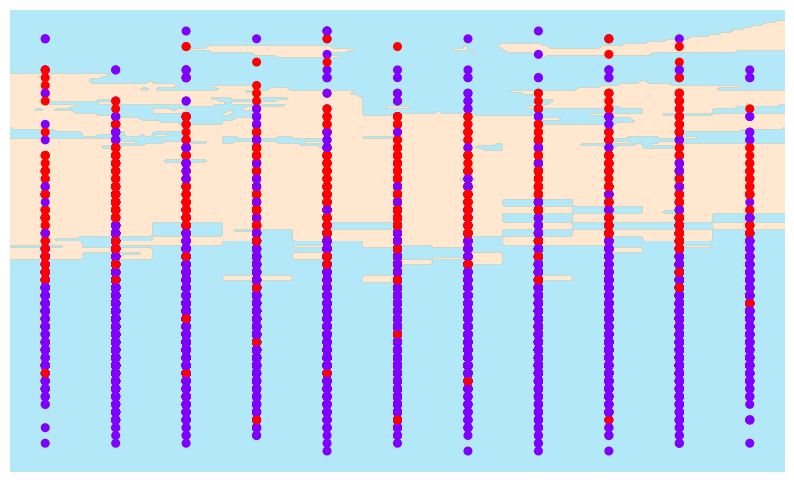

In [73]:
visualize_classifier(knn_best, X_train1.values, y_train1.values);

In [74]:
y_test_pred_proba = knn_best.predict_proba(X_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [75]:
y_test_pred_proba[:4]

array([[0.88888889, 0.11111111],
       [0.11111111, 0.88888889],
       [0.77777778, 0.22222222],
       [1.        , 0.        ]])

In [76]:
threshold = 0.4
y_pred = np.where(y_test_pred_proba[:,1]>threshold, 1,0)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.8982    0.8691    0.8834      3584
         1.0     0.5455    0.6146    0.5780       916

    accuracy                         0.8173      4500
   macro avg     0.7219    0.7419    0.7307      4500
weighted avg     0.8264    0.8173    0.8213      4500



In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Створення та навчання моделі kNN
knn = KNeighborsClassifier()
knn.fit(data['X_train'], data['train_targets'])

# Прогнози на тренувальному та валідаційному наборах
train_predictions = knn.predict_proba(data['X_train'])[:, 1]
val_predictions = knn.predict_proba(data['X_val'])[:, 1]

# Обчислення AUROC
train_auroc = roc_auc_score(data['train_targets'], train_predictions)
val_auroc = roc_auc_score(data['val_targets'], val_predictions)

# Виведення результатів
print(f'Train AUROC: {train_auroc:.4f}')
print(f'Validation AUROC: {val_auroc:.4f}')

# Висновок
if train_auroc > 0.9 and val_auroc > 0.9:
    conclusion = "Модель хороша з високою точністю."
elif train_auroc < 0.7 and val_auroc < 0.7:
    conclusion = "Модель погана з низькою точністю."
elif train_auroc > val_auroc:
    conclusion = "Модель має high variance (overfitting)."
else:
    conclusion = "Модель має high bias (underfitting)."

print(conclusion)


Train AUROC: 0.9559
Validation AUROC: 0.8526
Модель має high variance (overfitting).


Модель перенавчилась і має хороший результат лише на тернувальних даних. На валідаційних результат уже виходив краще з іншими моделями

2. Використовуючи `GridSearchCV` знайдіть оптимальне значення параметра `n_neighbors` для класифікатора `kNN`. Псотавте крос валідацію на 5 фолдів.

  Після успішного завершення пошуку оптимального гіперпараметра
    - виведіть найкраще значення параметра
    - збережіть в окрему змінну `knn_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `knn_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи стала вона краще порівняно з попереднім пукнтом (2) цього завдання? Чи є вона краще за дерево прийняття рішень з попереднього ДЗ?

In [46]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Налаштування параметрів для GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21)  # Перевірка значень від 1 до 20
}

# Створення моделі kNN
knn = KNeighborsClassifier()

# Налаштування GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(data['X_train'], data['train_targets'])

# Найкраще значення параметра n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f'Best n_neighbors: {best_n_neighbors}')

# Збереження найкращої моделі
knn_best = grid_search.best_estimator_

# Оцінка якості моделі на тренувальному та валідаційному наборах
train_predictions_best = knn_best.predict_proba(data['X_train'])[:, 1]
val_predictions_best = knn_best.predict_proba(data['X_val'])[:, 1]

train_auroc_best = roc_auc_score(data['train_targets'], train_predictions_best)
val_auroc_best = roc_auc_score(data['val_targets'], val_predictions_best)

# Виведення результатів
print(f'Train AUROC with best model: {train_auroc_best:.4f}')
print(f'Validation AUROC with best model: {val_auroc_best:.4f}')

# Висновок
if val_auroc_best > val_auroc:
    conclusion = "Модель з оптимізованим параметром kNN має кращу точність на валідаційних даних."
else:
    conclusion = "Модель з оптимізованим параметром kNN не має кращої точності на валідаційних даних."

print(conclusion)

Best n_neighbors: 19
Train AUROC with best model: 0.9227
Validation AUROC with best model: 0.8908
Модель з оптимізованим параметром kNN має кращу точність на валідаційних даних.


Поки що це не найкраща моя модель, так як попередні мали результат 0,93.

Дерево мало наступні результати
ROC AUC на тренувальних даних з кращими параметрами: 0.9289
ROC AUC на валідаційних даних з кращими параметрами: 0.9241

3. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `GridSearchCV` за сіткою параметрів
  - `max_depth` від 1 до 20 з кроком 2
  - `max_leaf_nodes` від 2 до 10 з кроком 1

  Обовʼязково при цьому ініціюйте модель з фіксацією `random_seed`.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `dt_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли вручну?

In [47]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import time

# Налаштування параметрів для GridSearchCV
param_grid = {
    'max_depth': list(range(1, 21, 2)),          # max_depth від 1 до 20 з кроком 2
    'max_leaf_nodes': list(range(2, 11, 1))     # max_leaf_nodes від 2 до 10 з кроком 1
}

# Створення моделі DecisionTreeClassifier з фіксацією random_seed
dt = DecisionTreeClassifier(random_state=42)

# Налаштування GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='roc_auc')

# Вимірювання часу пошуку
start_time = time.time()
grid_search.fit(data['X_train'], data['train_targets'])
end_time = time.time()

# Час виконання пошуку
search_time = end_time - start_time
print(f'GridSearchCV took {search_time:.2f} seconds.')

# Найкраще значення параметрів
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Збереження найкращої моделі
dt_best = grid_search.best_estimator_

# Оцінка якості моделі на тренувальному та валідаційному наборах
train_predictions_best = dt_best.predict_proba(data['X_train'])[:, 1]
val_predictions_best = dt_best.predict_proba(data['X_val'])[:, 1]

train_auroc_best = roc_auc_score(data['train_targets'], train_predictions_best)
val_auroc_best = roc_auc_score(data['val_targets'], val_predictions_best)

# Виведення результатів
print(f'Train AUROC with best model: {train_auroc_best:.4f}')
print(f'Validation AUROC with best model: {val_auroc_best:.4f}')

# Порівняння з моделлю, знайденою вручну
# Вручну знайдені значення AUROC для дерева прийняття рішень
train_auroc_dt_manual = 0.9289  # Приклад значення
val_auroc_dt_manual = 0.9241    # Приклад значення

if val_auroc_best > val_auroc_dt_manual:
    print("Модель DecisionTree з оптимізованими параметрами краще, ніж модель, знайдена вручну.")
else:
    print("Модель DecisionTree з оптимізованими параметрами не краще, ніж модель, знайдена вручну.")


GridSearchCV took 7.53 seconds.
Best parameters: {'max_depth': 5, 'max_leaf_nodes': 10}
Train AUROC with best model: 0.9015
Validation AUROC with best model: 0.9002
Модель DecisionTree з оптимізованими параметрами не краще, ніж модель, знайдена вручну.


Я в минулому завданні перебирала вручну дуже велику кількість параметрів, тому знайдений вручну результат краще. Перевірю зі збільшеним діапазоном.

In [48]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import time

# Налаштування параметрів для GridSearchCV
param_grid = {
    'max_depth': list(range(1, 81, 2)),          # max_depth від 1 до 20 з кроком 2
    'max_leaf_nodes': list(range(2, 21, 1))     # max_leaf_nodes від 2 до 10 з кроком 1
}

# Створення моделі DecisionTreeClassifier з фіксацією random_seed
dt = DecisionTreeClassifier(random_state=42)

# Налаштування GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='roc_auc')

# Вимірювання часу пошуку
start_time = time.time()
grid_search.fit(data['X_train'], data['train_targets'])
end_time = time.time()

# Час виконання пошуку
search_time = end_time - start_time
print(f'GridSearchCV took {search_time:.2f} seconds.')

# Найкраще значення параметрів
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Збереження найкращої моделі
dt_best = grid_search.best_estimator_

# Оцінка якості моделі на тренувальному та валідаційному наборах
train_predictions_best = dt_best.predict_proba(data['X_train'])[:, 1]
val_predictions_best = dt_best.predict_proba(data['X_val'])[:, 1]

train_auroc_best = roc_auc_score(data['train_targets'], train_predictions_best)
val_auroc_best = roc_auc_score(data['val_targets'], val_predictions_best)

# Виведення результатів
print(f'Train AUROC with best model: {train_auroc_best:.4f}')
print(f'Validation AUROC with best model: {val_auroc_best:.4f}')

# Порівняння з моделлю, знайденою вручну
# Вручну знайдені значення AUROC для дерева прийняття рішень
train_auroc_dt_manual = 0.9289  # Приклад значення
val_auroc_dt_manual = 0.9241    # Приклад значення

if val_auroc_best > val_auroc_dt_manual:
    print("Модель DecisionTree з оптимізованими параметрами краще, ніж модель, знайдена вручну.")
else:
    print("Модель DecisionTree з оптимізованими параметрами не краще, ніж модель, знайдена вручну.")


GridSearchCV took 57.36 seconds.
Best parameters: {'max_depth': 7, 'max_leaf_nodes': 20}
Train AUROC with best model: 0.9179
Validation AUROC with best model: 0.9173
Модель DecisionTree з оптимізованими параметрами не краще, ніж модель, знайдена вручну.


Дивно, що знайдені параметри вручну {'max_leaf_nodes': 40, 'max_depth': 10}
далекі від знайдених автоматично  {'max_depth': 7, 'max_leaf_nodes': 20}.


4. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `RandomizedSearchCV` за заданою сіткою параметрів і кількість ітерацій 40.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, зафіксуйте `random_seed` процедури крос валідації та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_random_search_best` найкращу модель, знайдену з `RandomizedSearchCV`
    - оцініть якість передбачень  `dt_random_search_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли з `GridSearch`?
    - проаналізуйте параметри `dt_random_search_best` і порівняйте з параметрами `dt_best` - яку бачите відмінність? Ця вправа потрібна аби зрозуміти, як різні налаштування `DecisionTreeClassifier` впливають на якість моделі.

In [ ]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [49]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import time

# Налаштування параметрів для RandomizedSearchCV
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Створення моделі DecisionTreeClassifier з фіксацією random_seed
dt = DecisionTreeClassifier(random_state=42)

# Налаштування RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=params_dt, n_iter=40, cv=3, scoring='roc_auc', random_state=42)

# Вимірювання часу пошуку
start_time = time.time()
random_search.fit(data['X_train'], data['train_targets'])
end_time = time.time()

# Час виконання пошуку
search_time = end_time - start_time
print(f'RandomizedSearchCV took {search_time:.2f} seconds.')

# Найкраще значення параметрів
best_params_random_search = random_search.best_params_
print(f'Best parameters from RandomizedSearchCV: {best_params_random_search}')

# Збереження найкращої моделі
dt_random_search_best = random_search.best_estimator_

# Оцінка якості моделі на тренувальному та валідаційному наборах
train_predictions_random_search_best = dt_random_search_best.predict_proba(data['X_train'])[:, 1]
val_predictions_random_search_best = dt_random_search_best.predict_proba(data['X_val'])[:, 1]

train_auroc_random_search_best = roc_auc_score(data['train_targets'], train_predictions_random_search_best)
val_auroc_random_search_best = roc_auc_score(data['val_targets'], val_predictions_random_search_best)

# Виведення результатів
print(f'Train AUROC with RandomizedSearchCV best model: {train_auroc_random_search_best:.4f}')
print(f'Validation AUROC with RandomizedSearchCV best model: {val_auroc_random_search_best:.4f}')

# Аналіз параметрів
print("Parameters from RandomizedSearchCV best model:")
for param, value in best_params_random_search.items():
    print(f"{param}: {value}")


RandomizedSearchCV took 1.63 seconds.
Best parameters from RandomizedSearchCV: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': 14, 'max_features': None, 'max_depth': 16, 'criterion': 'entropy'}
Train AUROC with RandomizedSearchCV best model: 0.9169
Validation AUROC with RandomizedSearchCV best model: 0.9166
Parameters from RandomizedSearchCV best model:
splitter: best
min_samples_split: 20
min_samples_leaf: 2
max_leaf_nodes: 14
max_features: None
max_depth: 16
criterion: entropy


Дуже цікаво, що знайдені випадковим чином значення майже такі ж точні як і методом підбору.

5. Якщо у Вас вийшла метрика `AUROC` в цій серії експериментів - зробіть ще один `submission` на Kaggle і додайте код для цього і скріншот скора на публічному лідерборді нижче.

  Сподіваюсь на цьому етапі ви вже відчули себе справжнім дослідником 😉

In [ ]:
Я уже раніше використовувала підбір параметрів, тому результат не став краще ніж з поточним сабмішином. Тому без скріншота.